In [1]:
import pandas

In [2]:
df = pandas.read_csv('/config/workspace/notebooks/data/Diamond.csv')
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [3]:
df = df.drop(columns = ['id' , 'x' , 'y' , 'z'])
df.head()

,carat,cut,color,clarity,depth,table,price
0,1.52,Premium,F,VS2,62.2,58.0,13619
1,2.03,Very Good,J,SI2,62.0,58.0,13387
2,0.70,Ideal,G,VS1,61.2,57.0,2772
3,0.32,Ideal,G,VS1,61.6,56.0,666
4,1.70,Premium,G,VS2,62.6,59.0,14453


In [4]:
X = df.iloc[ : , :-1]
Y = df.iloc[ : , -1:]
X.head()

,carat,cut,color,clarity,depth,table
0,1.52,Premium,F,VS2,62.2,58.0
1,2.03,Very Good,J,SI2,62.0,58.0
2,0.70,Ideal,G,VS1,61.2,57.0
3,0.32,Ideal,G,VS1,61.6,56.0
4,1.70,Premium,G,VS2,62.6,59.0


In [5]:
Y.head()

,price
0,13619
1,13387
2,2772
3,666
4,14453


In [6]:
num_columns = X.columns[X.dtypes != 'O']
cat_columns = X.columns[X.dtypes == 'O']

In [7]:
cat_columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [8]:
num_columns

Index(['carat', 'depth', 'table'], dtype='object')

In [9]:
df.clarity.unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [10]:
# Arranging Categorical variable in the order.
cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

In [11]:
from sklearn.impute import SimpleImputer         # To Handle MISSING Values.
from sklearn.preprocessing import StandardScaler # To Do Feature-Scaling.
from sklearn.preprocessing import OrdinalEncoder # To Handle categorical variables.
# For Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [12]:
# Pipeline for numerical variables.
num_pipeline = Pipeline(
    steps = 
    [
        ('Fill_NA' , SimpleImputer(strategy = 'median')) , 
        ('feature_scaling' , StandardScaler())
    ]
)

In [13]:
# Pipeline for categorical variables.
cat_pipeline = Pipeline(
    steps = 
    [
        ('Fill_NA' , SimpleImputer(strategy = 'most_frequent')) ,
        ('Encoding' , OrdinalEncoder(categories = [cut_categories , color_categories , clarity_categories])) , 
        ('feature_scaling' , StandardScaler())
    ]
)

In [14]:
# Now to cimbine num_pipeline and cat_pipeline
processor = ColumnTransformer(
    [
        ('num_pipeline' , num_pipeline , num_columns) ,
        ('cat_pipeline' , cat_pipeline , cat_columns)
    ]
)

In [15]:
# Train-Test-Split
from sklearn.model_selection import train_test_split

In [16]:
X_train , X_test , y_train , y_test = train_test_split(X , Y , test_size = 0.30 , random_state = 100)
X_train = pandas.DataFrame(processor.fit_transform(X_train) , columns = processor.get_feature_names_out())
X_test = pandas.DataFrame(processor.transform(X_test) , columns = processor.get_feature_names_out())

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [18]:
Linear_model = LinearRegression()
Ridge_model = Ridge()
Lasso_model = Lasso()
ElasticNet_model = ElasticNet()
Linear_model.fit(X_train , y_train)

LinearRegression()

In [38]:
Linear_model.fit(X_train , y_train)
y_predicted = Linear_model.predict(X_test)
r2_score(y_predicted , y_test)*100

92.01322946820235

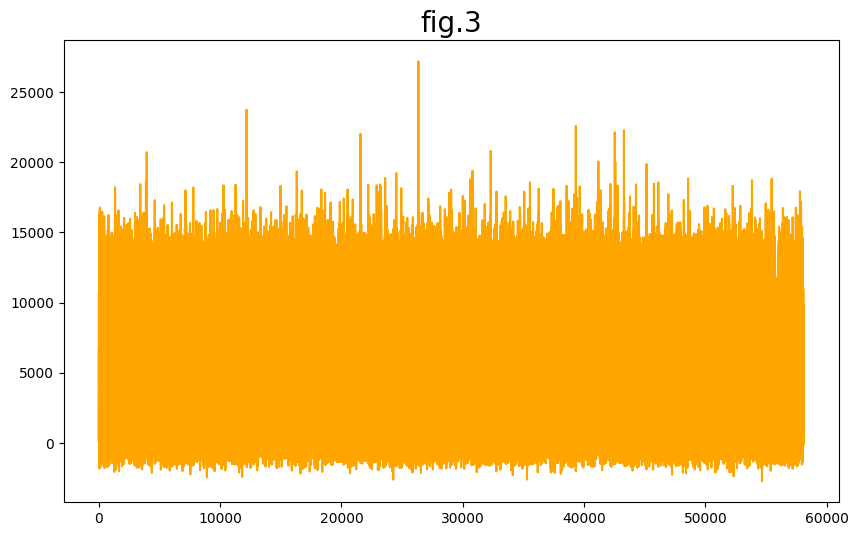

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.title('fig.3',fontsize=20)
#plt.plot(list(y_test) , 'blue') 
plt.plot(list(y_predicted) , 'orange')
plt.show()

In [39]:
Lasso_model.fit(X_train , y_train)
y_predicted = Lasso_model.predict(X_test)
r2_score(y_predicted , y_test)*100
c = 0
for i in y_predicted :
    if i < 0 :
        c += 1
print(c)

6883


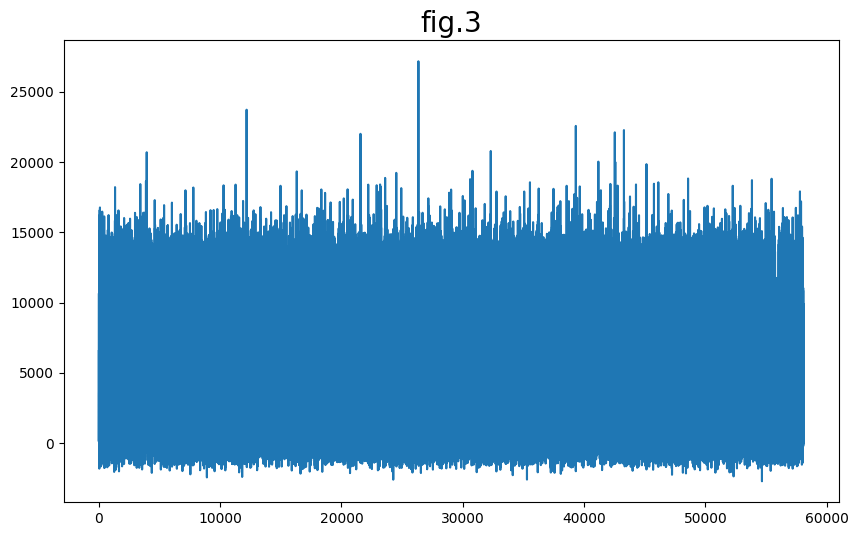

In [35]:
plt.figure(figsize=(10,6))
plt.title('fig.3',fontsize=20)
#plt.plot(list(y_test)) 
plt.plot(list(y_predicted))
plt.show()